In [18]:
import qsharp
from math import sqrt
import numpy as np
from numpy import arcsin, pi
import matplotlib.pyplot as plt
from PhaseEstimation import run

In [19]:
def run_simulation(n_shots, phi, n_oracle):
    """
    Run the quantum simulation for phase estimation.

    Parameters:
    - n_shots: Number of shots for simulation.
    - phi: True phase value.
    - n_oracle: Oracle power.

    Returns:
    Absolute difference between estimated and true phase.
    """
    result = run.simulate(nShots=n_shots, phi=phi, oraclePower=n_oracle)
    Onen = result[1]
    p_ = Onen / n_shots
    phi_ = (2/n_oracle) * (arcsin(sqrt(p_)) - (pi/4))
    return abs(phi_ - phi)

on as :
$$ p = sin^2(\frac{n_{oracle}\phi}{2} + \frac{\pi}{4}) $$
phi peut varier de -pi/2 a pi/2, 
Pour résoudre cette inéquation, nous allons suivre les étapes suivantes :

$$ -\frac{\pi}{2} \leq \frac{n_{oracle}\phi}{2} + \frac{\pi}{4} \leq \frac{\pi}{2} $$

1. Soustrayez  pi/4 de chaque côté de l'inéquation :

$$ -\frac{3\pi}{4} \leq \frac{n\phi}{2} \leq \frac{\pi}{4} $$

2. Multipliez chaque côté par 2/n (en supposant que n est différent de zéro, sinon, vous auriez une division par zéro) pour isoler phi:

$$ -\frac{3\pi}{2n} \leq \phi \leq \frac{\pi}{2n} $$

Ainsi, les valeurs de phi qui satisfont l'inéquation sont comprises entre $$ -\frac{3\pi}{2n} et  \frac{\pi}{2n} $$

In [20]:
def array_phi_values(n_oracle, pas):
    """
    Generate an array of phi values based on the specified oracle.
    
    Parameters:
    - n_oracle: Oracle power.
    - pas: Step size for phi values.

    Returns:
    Array of phi values.
    """
    lower_bound = -3 * pi / (2 * n_oracle)
    upper_bound = pi / (2 * n_oracle)
    # Boucle for itérant sur les valeurs de phi avec un pas
    phi_values = []
    x = -1
    y = 1
    if y >= upper_bound:
        y = int(upper_bound)
    if lower_bound >= x:
        x = int(lower_bound)
    while x <= y:
        phi_values.append(x)
        x += pas
    return phi_values


In [21]:
def find_best_parameter(n_values_shot, n_values_oracle, num_simulations, phi=None):
    """
    Find the best parameters for phase estimation.

    Parameters:
    - n_values_shot: List of shot values to consider.
    - n_values_oracle: List of oracle power values to consider.
    - num_simulations: Number of simulations to run.
    - phi: True phase value (optional).

    Returns:
    Best parameter values and a matrix of average differences.
    """
    avg_phi_differences = []
    best_values = {'n_shot': None, 'n_oracle': None, 'min_error': float('inf')}
    
    for n_shot in n_values_shot:
        avg_phi_diff_per_param = []

        for n_oracle in n_values_oracle:
            phi_differences = []

            for _ in range(num_simulations):
                if phi != None:
                    error = run_simulation(n_shot, phi, n_oracle)
                    phi_differences.append(error)
                else:
                    phi_values = array_phi_values(n_oracle, 0.2)
                    for phi_ in phi_values:
                        error = run_simulation(n_shot, phi_, n_oracle)
                        phi_differences.append(error)

            avg_phi_difference = sum(phi_differences) / len(phi_differences)
            avg_phi_diff_per_param.append(avg_phi_difference)

            if avg_phi_difference < best_values['min_error']:
                best_values['min_error'] = avg_phi_difference
                best_values['n_oracle'] = n_oracle
                best_values['n_shot'] = n_shot

        avg_phi_differences.append(avg_phi_diff_per_param)

    return best_values, avg_phi_differences

# Case 1: Varying n_shots

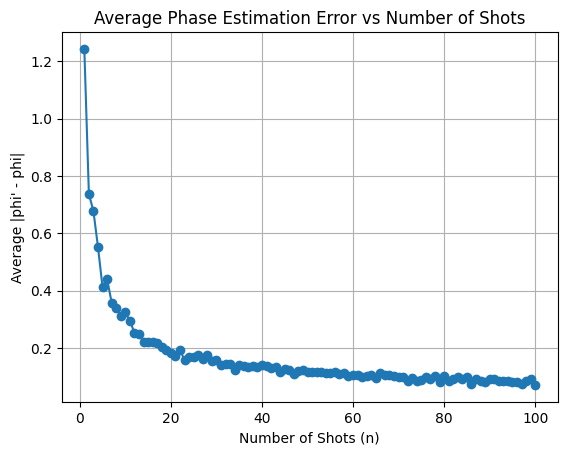

In [22]:
# run for ~3m
# Variation de 1 à 100 pour le nombre n_shot, avec une moyenne sur 15 simulations et un pas de 0,2 pour phi.
num_simulations = 15
n_values_shots = list(range(1, 101))
best_values_shots, avg_phi_diff_shots = find_best_parameter(
    n_values_shots, [1], num_simulations
)
flattened_avg_phi_diff_shots = np.array(avg_phi_diff_shots).flatten()

# Plotting the average results for Case 1
plt.plot(n_values_shots, flattened_avg_phi_diff_shots, marker='o', linestyle='-')
plt.title(f'Average Phase Estimation Error vs Number of Shots')
plt.xlabel('Number of Shots (n)')
plt.ylabel('Average |phi\' - phi|')
plt.grid(True)
plt.show()

In [23]:
from scipy.optimize import curve_fit

# Define a model function to fit (you need to define an appropriate function based on your data)
def model_function(x, a, b):
    # Ensure x is a numpy array for element-wise operations
    x = np.array(x)
    return b / (pow(x,a))

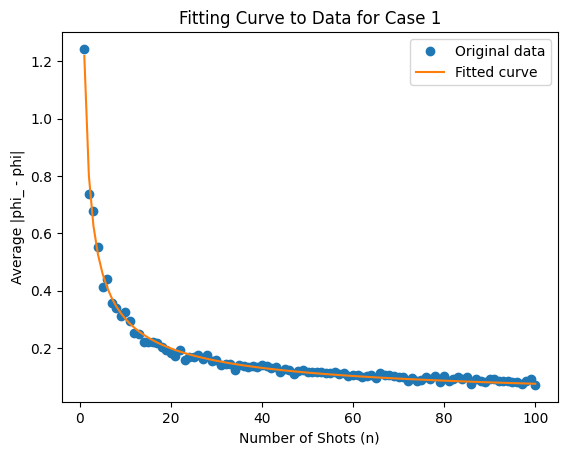

Alpha: 0.6063960517693641, Beta: 1.218664467958348


In [37]:
# Example usage for Case 1
popt_case1, pcov = curve_fit(model_function, n_values_shots, flattened_avg_phi_diff_shots)

# Plot the original data
plt.plot(n_values_shots, flattened_avg_phi_diff_shots, 'o', label='Original data')

# Plot the fitted curve
plt.plot(n_values_shots, model_function(n_values_shots, *popt_case1), '-', label='Fitted curve')

plt.title('Fitting Curve to Data for Case 1')
plt.xlabel('Number of Shots (n)')
plt.ylabel('Average |phi_ - phi|')
plt.legend()
plt.show()

alpha_case2, beta_case2 = popt_case1[0], popt_case1[1]
print(f"Alpha: {alpha_case2}, Beta: {beta_case2}")

# Case 2: Varying n_oracle

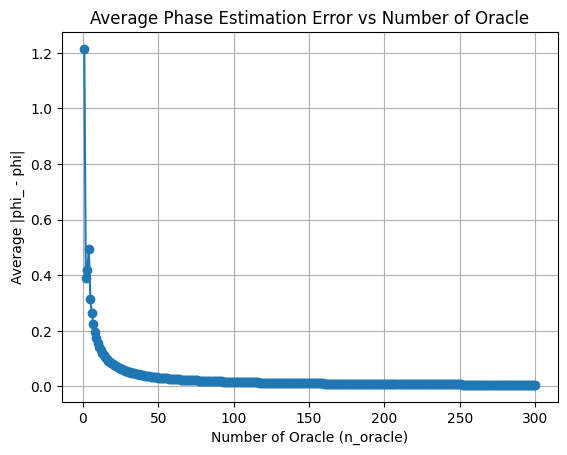

In [25]:
# run for ~1m
# Variation de 1 à 100 pour le nombre n_oracle, avec une moyenne sur 15 simulations et un pas de 0,2 pour phi.
num_simulations = 15
n_values_oracle = list(range(1, 301))

best_values_oracle, avg_phi_diff_oracle = find_best_parameter(
    [1], n_values_oracle, num_simulations
)

# Plotting the average results for Case 2
plt.plot(n_values_oracle, avg_phi_diff_oracle[0], marker='o', linestyle='-')
plt.title('Average Phase Estimation Error vs Number of Oracle')
plt.xlabel('Number of Oracle (n_oracle)')
plt.ylabel('Average |phi_ - phi|')
plt.grid(True)
plt.show()

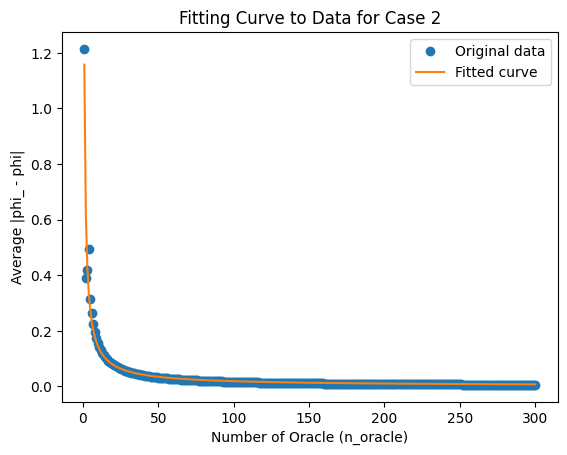

Fitted parameters for Case 2: [0.90234168 1.15752997]


In [26]:
# Example usage for Case 2
popt_case2, pcov_case2 = curve_fit(model_function, n_values_oracle, avg_phi_diff_oracle[0])

# Plot the original data
plt.plot(n_values_oracle, avg_phi_diff_oracle[0], 'o', label='Original data')

# Plot the fitted curve
plt.plot(n_values_oracle, model_function(n_values_oracle, *popt_case2), '-', label='Fitted curve')

plt.title('Fitting Curve to Data for Case 2')
plt.xlabel('Number of Oracle (n_oracle)')
plt.ylabel('Average |phi_ - phi|')
plt.legend()
plt.show()

alpha_case2, beta_case2 = popt_case2[0], popt_case2[1]
print(f"Alpha: {alpha_case2}, Beta: {beta_case2}")

In [27]:
from IPython.display import display, Math

# Fonctions pour imprimer en couleur
def print_color(text, color):
    print(f"\033[{color}m{text}\033[0m")

# Print the best values for Case n_shot
print_color("\n====================== Case n_shot =========================\n", "1;33")  # "1;34" correspond à la couleur bleue
print_color(f"Best values: {best_values_shots}", "1;34")  # "1;32" correspond à la couleur verte
alpha_case1, beta_case1 = popt_case1[0], popt_case1[1]

# Display the mathematical expression
display(Math(f'\\left|\\phi\'-\\phi\\right| \\leq \\frac{{{beta_case1}}}{{n^{{{alpha_case1}}}}}')) 
print_color(f"Alpha: {alpha_case1}, Beta: {beta_case1}", "1;32")  # "1;32" correspond à la couleur verte

# Print the best values for Case n_oracle
print_color("\n===================== Case n_oracle ========================\n", "1;33")
print_color(f"Best values: {best_values_oracle}", "1;34")
alpha_case2, beta_case2 = popt_case2[0], popt_case2[1]

# Display the mathematical expression
display(Math(f'\\left|\\phi\'-\\phi\\right| \\leq \\frac{{{beta_case2}}}{{n^{{{alpha_case2}}}}}'))
print_color(f"Alpha: {alpha_case2}, Beta: {beta_case2}", "1;32")





====================== Case n_shot =========================

Best values: {'n_shot': 100, 'n_oracle': 1, 'min_error': 0.0705854630916783}


<IPython.core.display.Math object>

Alpha: 0.6063960517693641, Beta: 1.218664467958348

===================== Case n_oracle ========================

Best values: {'n_shot': 1, 'n_oracle': 300, 'min_error': 0.005235987755982991}


<IPython.core.display.Math object>

Alpha: 0.9023416785659959, Beta: 1.1575299707882503


# Loi des Grand nombre:
$$\left|\phi'-\phi\right| \leq \frac{Cste}{\sqrt{n}}$$

case pour n_shot alpha -> tend vers ~1/2

case pour n_oracle aplha -> tend vers ~1

dans le cas de n_oracle on tend plus rapidement vers l'esperance de la variable aleatoire P.
on peut dire que n_oracle est plus pertinant pour des grand nombre


# Conclusion : Application de la Loi des Grands Nombres à l'Estimation de Phase

L'estimation de phase, un problème fondamental dans le domaine de l'informatique quantique, a été étudiée en utilisant la Loi des Grands Nombres pour analyser le comportement des erreurs d'estimation en fonction du nombre de tirs (n_shot) et du nombre d'oracles (n_oracle).

### 1. Loi des Grands Nombres :

La Loi des Grands Nombres stipule que la moyenne empirique d'une séquence de variables aléatoires converge vers leur espérance lorsque le nombre d'échantillons augmente. Cette loi a été appliquée à notre problème d'estimation de phase, où nous avons étudié la convergence de l'erreur d'estimation.

$$\left|\phi'-\phi\right| \leq \frac{Cste}{\sqrt{n}}$$
​
 

Cette inégalité exprime que l'erreur absolue entre la valeur estimée $\phi'$ et la vraie valeur $\phi$ diminue à mesure que le nombre d'échantillons n augmente.

### 2. Cas n_shot :

Dans le cas de la variation du nombre de tirs (n_shot), nous pouvons observé que le paramètre $\alpha$ tend vers environ 1/2. Cela signifie que l'erreur d'estimation diminue avec la racine carrée du nombre de tirs, indiquant une convergence relativement rapide vers la valeur attendue.

### 3. Cas n_oracle :

En revanche, pour la variation du nombre d'oracles (n_oracle), le paramètre $\alpha$ tend vers environ 1. Cela suggère une convergence plus rapide de l'erreur d'estimation avec le nombre d'oracles par rapport au nombre de tirs. Ainsi, dans le contexte de notre étude, l'utilisation d'un nombre plus important d'oracles semble être plus pertinente pour obtenir une estimation précise de la phase.

### résumé
l'application de la Loi des Grands Nombres à l'estimation de phase nous fournit des insights importants sur la convergence de l'erreur d'estimation en fonction du nombre d'échantillons. Dans le cas de notre problème spécifique, l'utilisation d'un nombre plus important d'oracles semble être particulièrement bénéfique pour garantir une estimation précise de la phase. Ces résultats ont des implications importantes pour la conception et l'optimisation des algorithmes d
'estimation de phase dans le contexte de l'informatique quantique.


# Case 3: Varying both n_shot and n_oracle

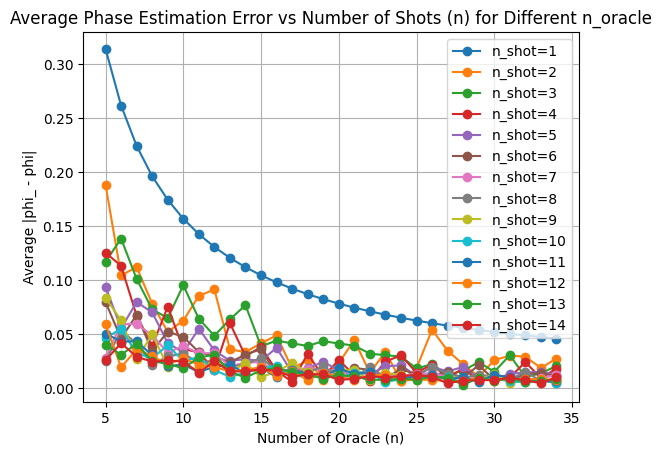

In [28]:
num_simulations = 10
n_shot_values_combined = list(range(1, 15))
n_oracle_values_combined = list(range(5, 35))
best_values_combined, avg_phi_diff_combined = find_best_parameter(
   n_shot_values_combined , n_oracle_values_combined, num_simulations
)

# Plotting the results for Case 3
for i, n_shot in enumerate(n_shot_values_combined):
    plt.plot(n_oracle_values_combined , avg_phi_diff_combined[i], marker='o', linestyle='-', label=f'n_shot={n_shot}')

plt.title('Average Phase Estimation Error vs Number of Shots (n) for Different n_oracle')
plt.xlabel('Number of Oracle (n)')
plt.ylabel('Average |phi_ - phi|')
plt.legend()
plt.grid(True)
plt.show()

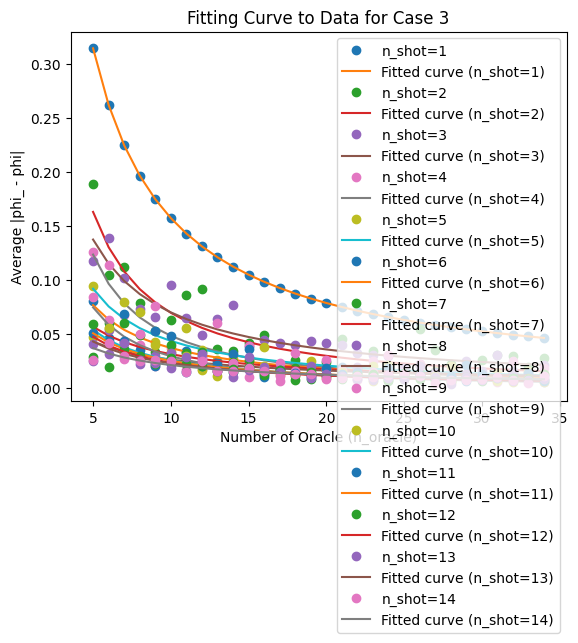

In [35]:


# Fit curves for each n_shot value in Case 3
fitted_parameters_case3 = []

for i, n_shot in enumerate(n_shot_values_combined):
    popt_case3, pcov_case3 = curve_fit(model_function, n_oracle_values_combined, avg_phi_diff_combined[i])
    fitted_parameters_case3.append(popt_case3)

    # Plot the original data for each n_shot
    plt.plot(n_oracle_values_combined, avg_phi_diff_combined[i], 'o', label=f'n_shot={n_shot}')

    # Plot the fitted curve for each n_shot
    plt.plot(n_oracle_values_combined, model_function(n_oracle_values_combined, *popt_case3), '-', label=f'Fitted curve (n_shot={n_shot})')

plt.title('Fitting Curve to Data for Case 3')
plt.xlabel('Number of Oracle (n_oracle)')
plt.ylabel('Average |phi_ - phi|')
plt.legend()
plt.show()



In [38]:
# Print the fitted parameters for Case 3
print("Fitted parameters for Case 3:")
for i, n_shot in enumerate(n_shot_values_combined):
    print(f"n_shot={n_shot}: alpha:{fitted_parameters_case3[i][0]}     Beta:{fitted_parameters_case3[i][1]}")

print("\nBest values for Case 3:", best_values_combined)

Fitted parameters for Case 3:
n_shot=1: alpha:1.0     Beta:1.5707963267948966
n_shot=2: alpha:1.2282466435267296     Beta:1.1753499739855808
n_shot=3: alpha:0.9740193106156395     Beta:0.6580726010635912
n_shot=4: alpha:1.3554316935845248     Beta:1.0927480967447079
n_shot=5: alpha:1.0772995436951904     Beta:0.5193987112996555
n_shot=6: alpha:1.0522670054882506     Beta:0.41610380148582715
n_shot=7: alpha:0.8569604886968651     Beta:0.22440638249880077
n_shot=8: alpha:0.7081247151383869     Beta:0.13368847518108104
n_shot=9: alpha:1.345805928042611     Beta:0.6497017860737619
n_shot=10: alpha:1.0622733351955416     Beta:0.29581898791530814
n_shot=11: alpha:1.0120347643316385     Beta:0.25766448564919925
n_shot=12: alpha:1.0262003658230343     Beta:0.24658195702215158
n_shot=13: alpha:0.9187696217489575     Beta:0.18833842658793884
n_shot=14: alpha:0.8007132529481352     Beta:0.1335335598921725

Best values for Case 3: {'n_shot': 13, 'n_oracle': 28, 'min_error': 0.0033066444434624786}
